# Multiclass classification (simple label) - Classifying newswires

## Reuters dataset

Comes in the form of four NumPy arrays

In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Data shape

In [3]:
train_data.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [5]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


Labels

In [6]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

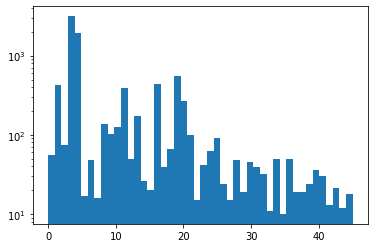

In [7]:
import matplotlib.pyplot as plt
_ = plt.hist(train_labels, bins=46, log=True)

Decoding newswires

In [8]:
word_index = reuters.get_word_index()
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that the indices are offset by 3 because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Preparing the data

Vectorization of the data - each newswire becomes a n-dimensional vector of zeros and ones

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

One-hot encoding - also called categorical encoding

In [11]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Neural network

Model definition

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Validation set

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training the network

In [14]:
import tensorflow as tf

In [16]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 131us/sample - loss: 2.5240 - acc: 0.5460 - val_loss: 1.6744 - val_acc: 0.6550
Epoch 2/20
7982/7982 [==============================] - 1s 87us/sample - loss: 1.3735 - acc: 0.7154 - val_loss: 1.2826 - val_acc: 0.7230
Epoch 3/20
7982/7982 [==============================] - 1s 87us/sample - loss: 1.0273 - acc: 0.7828 - val_loss: 1.1201 - val_acc: 0.7660
Epoch 4/20
7982/7982 [==============================] - 1s 86us/sample - loss: 0.8069 - acc: 0.8309 - val_loss: 1.0357 - val_acc: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.6430 - acc: 0.8637 - val_loss: 0.9622 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.5098 - acc: 0.8923 - val_loss: 0.9244 - val_acc: 0.8060
Epoch 7/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.4137 - acc: 0.9133 - val_loss: 0.9073 - val_acc:

Results

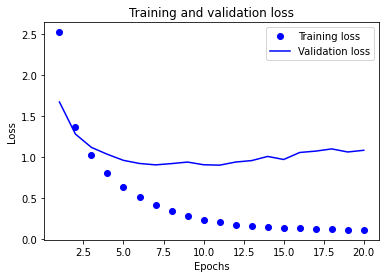

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

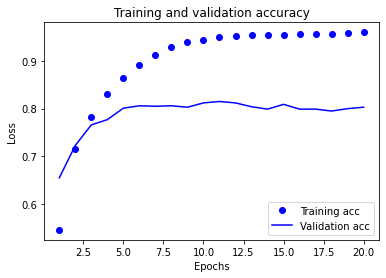

In [20]:
plt.clf()  

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

It seems that the network starts overfitting after 8 epochs. Let's train a new network from scratch for 8 epochs, then let's evaluate it on 
the test set:

In [21]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 100us/sample - loss: 2.4952 - acc: 0.5098 - val_loss: 1.7105 - val_acc: 0.6330
Epoch 2/8
7982/7982 [==============================] - 1s 86us/sample - loss: 1.4147 - acc: 0.7076 - val_loss: 1.3184 - val_acc: 0.7160
Epoch 3/8
7982/7982 [==============================] - 1s 86us/sample - loss: 1.0702 - acc: 0.7721 - val_loss: 1.1527 - val_acc: 0.7540
Epoch 4/8
7982/7982 [==============================] - 1s 87us/sample - loss: 0.8474 - acc: 0.8239 - val_loss: 1.0700 - val_acc: 0.7790
Epoch 5/8
7982/7982 [==============================] - 1s 87us/sample - loss: 0.6738 - acc: 0.8592 - val_loss: 0.9851 - val_acc: 0.7860
Epoch 6/8
7982/7982 [==============================] - 1s 86us/sample - loss: 0.5442 - acc: 0.8862 - val_loss: 0.9285 - val_acc: 0.7970
Epoch 7/8
7982/7982 [==============================] - 1s 86us/sample - loss: 0.4344 - acc: 0.9077 - val_loss: 0.9154 - val_acc: 0.8040

In [22]:
results

[0.9919323364964364, 0.7796082]

## Generating predictions on new data

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

0.99999994

In [27]:
np.argmax(predictions[0])

3